In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

In [2]:
from konlpy.tag import Hannanum
from urllib.request import urlopen
from lxml import html
from collections import Counter
import nltk

import random
import pytagcloud      # requires Korean font support
import webbrowser

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
word = pd.read_csv('./teample_1/hankyure_society_utf.csv', sep=',', encoding='utf-8')
# word

In [4]:
xyz = list(word['제목'])

In [5]:
words = str()

for i in range(len(xyz)):
    words += xyz[i]

# words

### 트위터로 단어 뽑기

In [6]:
# from konlpy.tag import Hannanum
# from konlpy.tag import Kkma
# from konlpy.tag import Komoran
# from konlpy.tag import Mecab
from konlpy.tag import Twitter

In [8]:
twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

C:\Python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [12]:
tmp_wordsource_society = count3.most_common()
tmp_wordsource_society

[('명', 727),
 ('전', 522),
 ('포토', 496),
 ('검찰', 483),
 ('경찰', 472),
 ('의혹', 353),
 ('인사', 344),
 ('수사', 329),
 ('서울', 302),
 ('등', 293),
 ('날씨', 286),
 ('제주', 285),
 ('소식', 270),
 ('단독', 262),
 ('재판', 260),
 ('궂긴', 259),
 ('한국', 259),
 ('조사', 256),
 ('도', 238),
 ('첫', 235),
 ('혐의', 230),
 ('법원', 225),
 ('부산', 225),
 ('인천', 223),
 ('알림', 217),
 ('미세먼지', 214),
 ('후보', 214),
 ('안', 203),
 ('여성', 201),
 ('중', 197),
 ('비', 195),
 ('박근혜', 192),
 ('노조', 185),
 ('논란', 185),
 ('위', 180),
 ('전국', 178),
 ('동정', 177),
 ('사건', 174),
 ('구속', 172),
 ('노동자', 169),
 ('의원', 167),
 ('시민', 167),
 ('피해자', 165),
 ('사법', 164),
 ('화재', 161),
 ('삼성', 161),
 ('압수수색', 160),
 ('폭염', 160),
 ('양승태', 157),
 ('성추행', 153),
 ('정부', 150),
 ('징역', 149),
 ('학교', 147),
 ('것', 147),
 ('불법', 146),
 ('세월호', 146),
 ('광주', 146),
 ('피해', 146),
 ('대구', 145),
 ('왜', 145),
 ('오늘', 143),
 ('선거', 141),
 ('곳', 141),
 ('교육', 140),
 ('또', 139),
 ('출석', 139),
 ('검사', 137),
 ('성폭력', 135),
 ('농단', 135),
 ('속', 135),
 ('소환', 134),
 ('사망', 1

### (중간)데이터프레임화하기

In [10]:
common_word_society = pd.DataFrame({'사회단어' : count3.most_common()})

In [11]:
common_word_society

,사회단어
0,"(명, 727)"
1,"(전, 522)"
2,"(포토, 496)"
3,"(검찰, 483)"
4,"(경찰, 472)"
5,"(의혹, 353)"
6,"(인사, 344)"
7,"(수사, 329)"
8,"(서울, 302)"
9,"(등, 293)"


### (중간)데이터프레임화한 것 저장

In [11]:
common_word_society.to_csv('teample_1/common_word_society_utf.csv', sep=',', encoding='utf-8')

In [12]:
common_word_society.to_csv('teample_1/common_word_society_euc.csv', sep=',', encoding='euc-kr')

## 단어 분류

In [13]:
one_words = []
tow_words = []
etc_words = []
for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(13037, 64488, 20261)

In [14]:
one_words = list(set(one_words))
tow_words = list(set(tow_words))
etc_words = list(set(etc_words))

len(one_words), len(tow_words), len(etc_words)

(609, 7669, 5087)

In [15]:
for word in one_words:
    print(word, end='\t')

공	최	씨	소	급	료	결	수	쉬	논	켜	을	변	혼	문	힌	바	함	실	두	퀸	추	응	담	병	역	금	돌	콩	잣	감	세	듯	혹	송	타	냥	텍	교	삐	카	여	땡	적	균	더	휘	런	굿	익	숯	쭉	신	온	중	택	레	천	엘	망	접	킥	펍	쏙	격	꽃	뭣	찰	맨	규	떼	막	맏	펜	궁	채	착	콕	배	행	헌	구	요	몸	관	폭	섬	퇴	뼈	낼	잔	만	댕	궂	숲	꿀	딸	칸	악	해	눈	삽	형	빛	분	쉭	덕	볼	쿵	덜	흙	웃	윤	방	법	누	칠	움	러	점	숙	꼽	봄	척	활	양	랬	녀	덩	꼬	선	향	혈	탕	새	그	인	부	창	란	겉	강	첩	임	베	충	애	밑	메	던	통	날	측	풀	네	련	박	녁	순	벨	퍽	꾹	샘	노	깡	길	철	떡	니	옷	청	옹	년	유	끝	옆	의	슛	효	율	사	농	빵	률	곧	끼	벌	촌	졸	멍	승	겨	각	릴	특	잠	샷	뼛	턴	넋	식	깨	렬	조	도	팩	일	매	좌	광	밸	옵	밭	웬	댁	탑	확	꼭	열	표	리	셀	염	은	기	작	짓	취	팥	및	탈	뜻	겡	핀	땐	핫	류	줄	오	잡	놀	볕	민	뭐	홍	즈	랭	저	끌	로	합	권	량	값	밥	앱	씌	굽	객	간	협	삼	팽	침	굴	영	알	징	쌀	뻔	낯	컵	슬	건	팅	쇳	짝	틈	골	템	백	콜	속	쇼	품	목	반	원	때	곳	국	잎	읍	쩍	평	뺨	님	스	팔	쌤	론	션	콘	거	월	띠	나	릭	편	빚	꿈	액	파	장	엠	석	당	티	초	항	낚	탓	답	개	피	견	캠	킴	묵	설	킹	죄	휑	핵	며	후	꼴	혔	족	게	팬	자	삶	환	데	괌	약	잼	껄	못	호	범	훈	맥	홀	룰	살	독	디	큐	봇	딩	것	주	생	웹	셋	햇	질	직	춤	뿐	쇠	앗	밤	맛	넷	쉰	섭	삵	색	왕	똑	펄	집	뚝	재	줌	득	빈	위	닭	물	키	투	달	탁	걸	팍	똥	푹	톨	전	쪽	닷	책	태	꽝	모	폰	흥	첫	넌	늘	헛	낫	죽	찬	뇨	욱	헤	몇	겁	학	케	체	고	별	낮	비	축	군	남	돔	경	트	얍	쾅	총	링	펑	습	판	이	밖	욕	틀	연	숨	싹	퍼	발	손	웅	휜	끈	좇	쇄	종	준	증	곁	회	곤	층	텐	폐	황	절	톡	어	땀	쑥	쟁	포	겸	북	정	퀄	압	획	앞	느	털	보	밀	벼	터	힐	갑	진	업	뜸	빅	댐	워	면	맘	토	돈	

In [42]:
stop_words = []
sw_time = ['오늘', '어제', '미래', '내일', '시작', '하루', '올해', '오전', '오후', '하루', '이번', '다시', '마지막','개월', '내년']
sw_various = ['알림','소식', '궂긴', '기업', '회장','최대','대통령','한국','청와대','대표','포토','의원','정부','정치','후보','추진','이유','달라','만난','누구','사진','직접','마련','리선']
sw_region = ['서울','대전','대구','부산','울산','광주','제주','제주도']
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
stop_words.extend(sw_time)
stop_words.extend(sw_various)
stop_words.extend(sw_region)
len(stop_words)

656

In [43]:
# stop_words 빼기
society_nouns = [word for word in nouns3 if word not in stop_words]
len(society_nouns)

79504

In [44]:
society_nouns[:10]

['대한민국', '일자리', '대학', '표준', '공기', '보장', '농민', '임금', '투쟁', '박정희']

In [45]:
society  = nltk.Text(society_nouns, name='사회기사')
type(society), len(society)

(nltk.text.Text, 79504)

In [46]:
society.vocab().most_common(30)

[('검찰', 483),
 ('경찰', 472),
 ('의혹', 353),
 ('인사', 344),
 ('수사', 329),
 ('날씨', 286),
 ('단독', 262),
 ('재판', 260),
 ('조사', 256),
 ('혐의', 230),
 ('법원', 225),
 ('인천', 223),
 ('미세먼지', 214),
 ('여성', 201),
 ('박근혜', 192),
 ('노조', 185),
 ('논란', 185),
 ('전국', 178),
 ('동정', 177),
 ('사건', 174),
 ('구속', 172),
 ('노동자', 169),
 ('시민', 167),
 ('피해자', 165),
 ('사법', 164),
 ('화재', 161),
 ('삼성', 161),
 ('압수수색', 160),
 ('폭염', 160),
 ('양승태', 157)]

## 워드클라우드 한글폰트 설정

In [47]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [48]:
data = society.vocab().most_common(1000)
len(data)

1000

In [49]:
data[:10]

[('검찰', 483),
 ('경찰', 472),
 ('의혹', 353),
 ('인사', 344),
 ('수사', 329),
 ('날씨', 286),
 ('단독', 262),
 ('재판', 260),
 ('조사', 256),
 ('혐의', 230)]

In [50]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

1000

### 워드클라우드 그리기

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [52]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(dict_data)

(-0.5, 399.5, 199.5, -0.5)

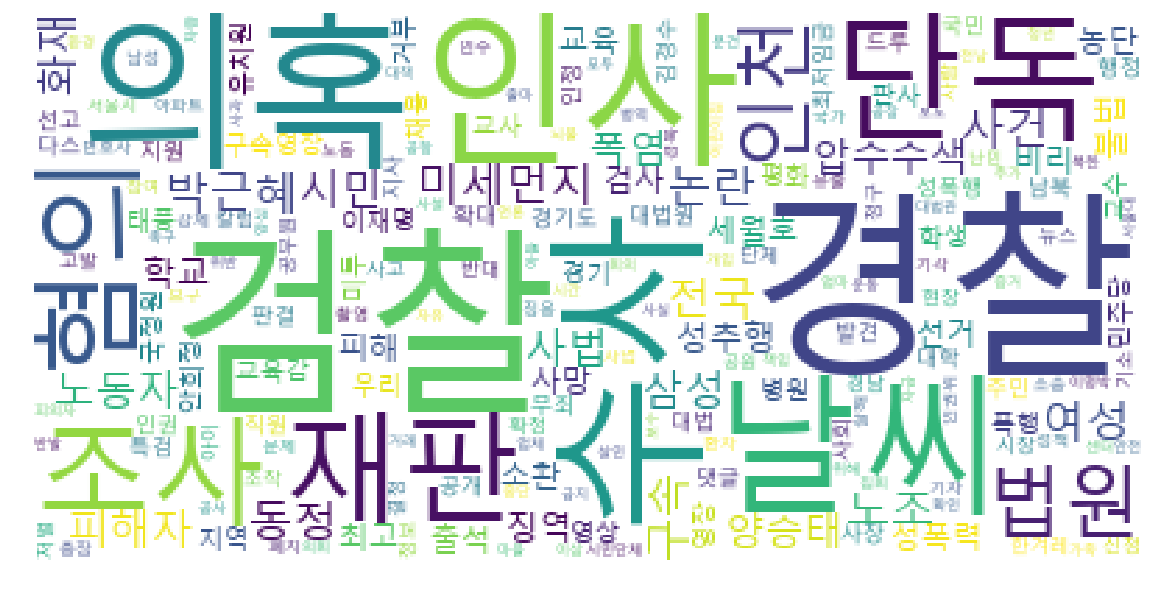

In [53]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis('off')

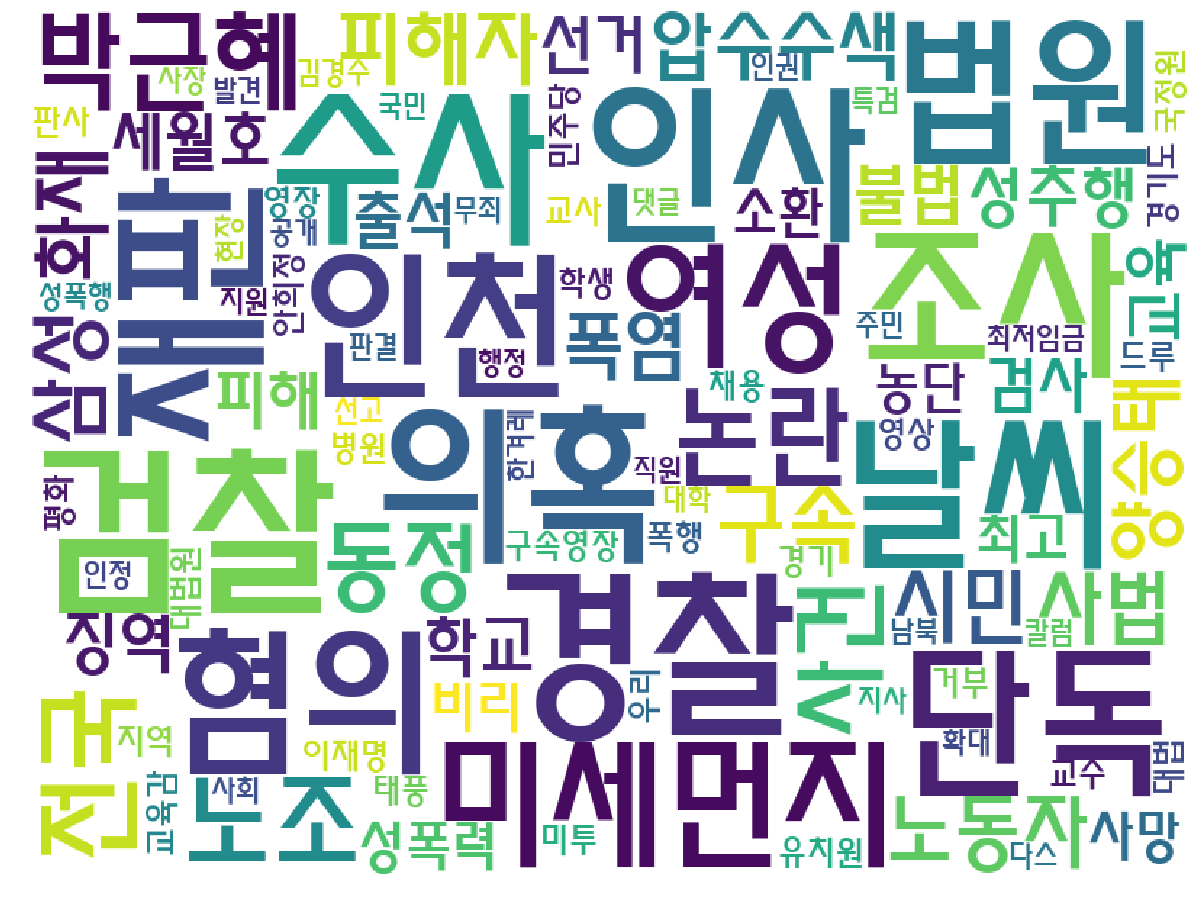

In [54]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'teample_1_result/society_add_stopwords_1.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)